Сорокін Олександр Варіант 21
Практична 6 
Завдання 2

1.	Завантажити набір даних.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

2.	Розділити дані на тренувальний та тестовий набори.

In [58]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.	Застосувати випадковий ліс для визначення важливих ознак

In [59]:
SvmCl = SVC(kernel='linear')
SvmCl.fit(X_train, y_train)

RfCl = RandomForestClassifier(random_state=42)
RfCl.fit(X_train, y_train)

ImpRf = RfCl.feature_importances_ 
RfInd = np.argsort(ImpRf)[::-1]
SvmCoeff = np.abs(SvmCl.coef_[0])  
svm_ind = np.argsort(SvmCoeff)[::-1]

4.	Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

Feature importance's Random Forest:
1. worst area:0.1539
2. worst concave points:0.1447
3. mean concave points:0.1062
4. worst radius:0.0780
5. mean concavity:0.0680
6. worst perimeter:0.0671
7. mean perimeter:0.0533
8. mean radius:0.0487
9. mean area:0.0476
10. worst concavity:0.0318


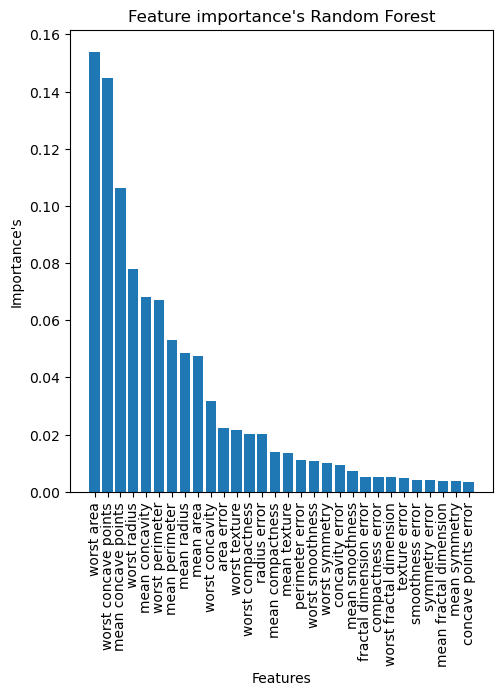

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Feature importance's Random Forest")
plt.bar(range(X_train.shape[1]), ImpRf[RfInd], align="center")
plt.xticks(range(X_train.shape[1]),data.feature_names[RfInd], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance's")

print("Feature importance's Random Forest:")
for i in range(10):
    print(f"{i + 1}. {data.feature_names[RfInd[i]]}:{ImpRf[RfInd[i]]:.4f}")

SVM 

Feature importance's SVM:
1. worst concavity:1.7249
2. texture error:1.6050
3. mean radius:1.2550
4. worst symmetry:1.1955
5. worst compactness:0.9003
6. mean concavity:0.6751
7. worst concave points:0.6310
8. worst smoothness:0.4670
9. mean concave points:0.3992
10. mean symmetry:0.3429


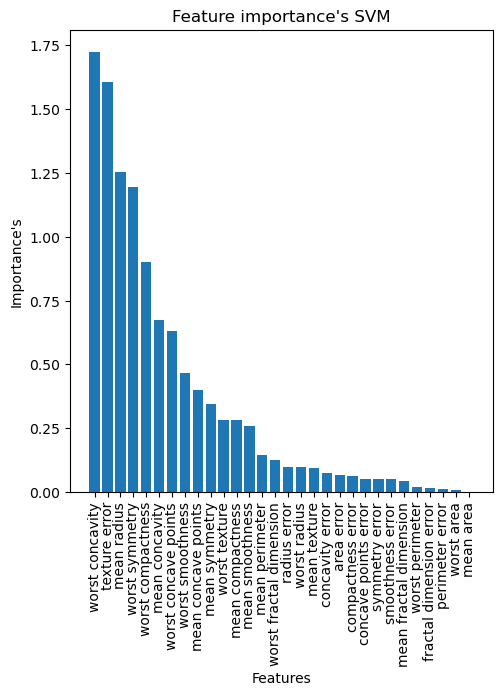

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Feature importance's SVM")
plt.bar(range(X_train.shape[1]), SvmCoeff[svm_ind], align="center")
plt.xticks(range(X_train.shape[1]),data.feature_names[svm_ind], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance's")

print("Feature importance's SVM:")
for i in range(10):
    print(f"{i + 1}. {data.feature_names[svm_ind[i]]}:{SvmCoeff[svm_ind[i]]:.4f}")

6.	Обчислити точність для двох алгоритмів і порівняти результати

In [62]:
SvmPred = SvmCl.predict(X_test)
RfPred = RfCl.predict(X_test)
SvmAcc = accuracy_score(y_test, SvmPred)
RfAcc = accuracy_score (y_test, RfPred)
print(f"Random forest acc: {RfAcc:.4f}")
print(f"SVM acc: {SvmAcc:.4f}")
if SvmAcc > RfAcc:
    print("SVM більш точна ніж forest")
elif SvmAcc < RfAcc:
    print("RND forest точніший ніж SVM ")
else:
    print("Однакова точність")

Random forest acc: 0.9649
SVM acc: 0.9561
RND forest точніший ніж SVM 


Висновок:SVM є потужним алгоритмом, який може забезпечити високу точність класифікації, однак він дуже чутливий до “шуму даних” і повільний для навчання з великими наборами даних.В той час як Random Forest більш стійкий до шуму даних та має велику швидкість обробки великого набору даних, але має меншу точність. В данному випадку останній показав себе краще ніж SVM.